## Budget vs Revenue

## Table of Contents


* [***Data Importing***](#Data-Importing)   (links to the data sources below.)
     * [Box Office Mojo](https://www.boxofficemojo.com/)
     * [IMDB](https://www.imdb.com/)
     * [Rotten Tomatoes](https://www.rottentomatoes.com/)
     * [TheMovieDB](https://www.themoviedb.org/)
     * [The Numbers](https://www.the-numbers.com/)
* [***Data Cleaning***](#Data-Cleaning)
* [***Budget vs. Revenue Correlation***](#Budget-vs.-Revenue-Correlation)
* [***Top Studios Budgets***](#Top-Studios-Budgets)


Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm


## Data Importing

In [2]:
movies_budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
movies_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


## Data Cleaning

In [3]:
# creates a production column int column
production_budget = [] 

for budget in movies_budget['production_budget']:
    budget = int(budget[1:].replace(",", ""))
    production_budget.append(budget)
    
movies_budget['production_budgetINT'] = production_budget

In [4]:
# creates a domestic gross int column
domestic_gross = [] 

for gross in movies_budget['domestic_gross']:
    gross = int(gross[1:].replace(",", ""))
    domestic_gross.append(gross)
    
movies_budget['domestic_grossINT'] = domestic_gross

In [5]:
# creates a worldwide gross int column
worldwide_gross = [] 

for gross in movies_budget['worldwide_gross']:
    gross = int(gross[1:].replace(",", ""))
    worldwide_gross.append(gross)
    
movies_budget['worldwide_grossINT'] = worldwide_gross

Removing all movies with a worldwide gross of 0 these.

In [6]:
movies_budget = movies_budget[movies_budget.worldwide_grossINT > 0]

In [7]:
movies_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budgetINT,domestic_grossINT,worldwide_grossINT
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317000000,620181382,1316721747


In [8]:
# Read in CSV and TSV files
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [9]:
movie_studio_budget = movies_budget.merge(movie_gross, how = 'inner', left_on = 'movie', right_on = 'title')
movie_studio_budget = movie_studio_budget[['release_date', 'movie', 'studio','production_budgetINT','worldwide_grossINT']]
movie_studio_budget.head()

,release_date,movie,studio,production_budgetINT,worldwide_grossINT
0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,BV,410600000,1045663875
1,"May 1, 2015",Avengers: Age of Ultron,BV,330600000,1403013963
2,"Apr 27, 2018",Avengers: Infinity War,BV,300000000,2048134200
3,"Nov 17, 2017",Justice League,WB,300000000,655945209
4,"Nov 6, 2015",Spectre,Sony,300000000,879620923


In [10]:
#make release date datetime
movie_studio_budget['release_date'] = pd.to_datetime(movie_studio_budget['release_date'])

In [11]:
#how big is it?
len(movie_studio_budget)

1243

In [12]:
#drop one null studio row
movie_studio_budget = movie_studio_budget.dropna()

In [13]:
#check to see unique studios
movie_studio_budget['studio'].unique()

array(['BV', 'WB', 'Sony', 'WB (NL)', 'Uni.', 'Par.', 'Fox', 'P/DW',
       'STX', 'LGF', 'LG/S', 'TriS', 'Wein.', 'MBox', 'Free', 'Rela.',
       'IFC', 'EOne', 'FD', 'ORF', 'NM', 'Sum.', 'SGem', 'Focus',
       'Annapurna', 'W/Dim.', 'Studio 8', 'MGM', 'MNE', 'BG', 'Magn.',
       'Strand', 'CBS', 'SPC', 'BSC', 'ENTMP', 'RTWC', 'Gold.', 'FoxS',
       'RAtt.', 'GrtIndia', 'BST', 'VE', 'ParV', 'ALP', 'Anch.', 'Yash',
       'EC', 'Over.', 'A24', 'Amazon', 'OMNI/FSR', 'Mira.', 'CE', 'PH',
       'KE', 'Saban', 'Global Road', 'PFR', 'Eros', 'CJ', 'ATO', 'IW',
       'FCW', 'Neon', 'LD', 'Cohen', 'Alc', 'UTV', 'App.', 'Relbig.',
       'First', 'Scre.', 'GK', 'Cleopatra', 'Osci.', 'ELS', 'WHE', 'RLJ',
       'TFA', 'Jan.', 'Affirm', '3D', 'BH Tilt', 'Mont.', 'SMod', 'IM',
       'P4', 'Drft.', 'PNT', 'Viv.', 'NFC', 'Orch.', 'IVP', 'LGP',
       'Trib.', 'Kino', 'BBC', 'DR'], dtype=object)

In [14]:
#make new variable called studio to edit studio names
studios = movie_studio_budget['studio']

#rename studios that are the same with different names in the dataset
studios[studios.str.contains('WB')] = 'WB'


# merge the studio variable back into dataframe
movie_studio_budget['studio'] = studios

studios.unique()

array(['BV', 'WB', 'Sony', 'Uni.', 'Par.', 'Fox', 'P/DW', 'STX', 'LGF',
       'LG/S', 'TriS', 'Wein.', 'MBox', 'Free', 'Rela.', 'IFC', 'EOne',
       'FD', 'ORF', 'NM', 'Sum.', 'SGem', 'Focus', 'Annapurna', 'W/Dim.',
       'Studio 8', 'MGM', 'MNE', 'BG', 'Magn.', 'Strand', 'CBS', 'SPC',
       'BSC', 'ENTMP', 'RTWC', 'Gold.', 'FoxS', 'RAtt.', 'GrtIndia',
       'BST', 'VE', 'ParV', 'ALP', 'Anch.', 'Yash', 'EC', 'Over.', 'A24',
       'Amazon', 'OMNI/FSR', 'Mira.', 'CE', 'PH', 'KE', 'Saban',
       'Global Road', 'PFR', 'Eros', 'CJ', 'ATO', 'IW', 'FCW', 'Neon',
       'LD', 'Cohen', 'Alc', 'UTV', 'App.', 'Relbig.', 'First', 'Scre.',
       'GK', 'Cleopatra', 'Osci.', 'ELS', 'WHE', 'RLJ', 'TFA', 'Jan.',
       'Affirm', '3D', 'BH Tilt', 'Mont.', 'SMod', 'IM', 'P4', 'Drft.',
       'PNT', 'Viv.', 'NFC', 'Orch.', 'IVP', 'LGP', 'Trib.', 'Kino',
       'BBC', 'DR'], dtype=object)

## Budget vs. Revenue Correlation

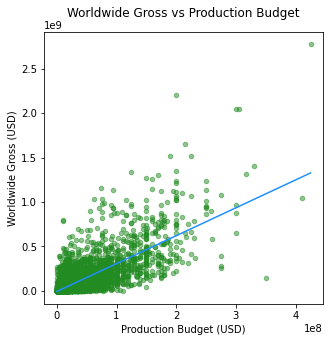

In [15]:
#plot scatterplot of budget and revenue to show relationship between the two
fig = plt.subplots(figsize=(5, 5))
x = movies_budget['production_budgetINT']
 
y = movies_budget['worldwide_grossINT']

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.title('Worldwide Gross vs Production Budget', pad = 15)

plt.xlabel('Production Budget (USD)')
plt.ylabel('Worldwide Gross (USD)')

plt.scatter(x, y, c ="forestgreen", alpha = .5, s = 20)
plt.plot(x, p(x), color = "dodgerblue")

*Note the diminishing returns on production budget

<AxesSubplot:xlabel='Production Budget (USD)', ylabel='Density'>

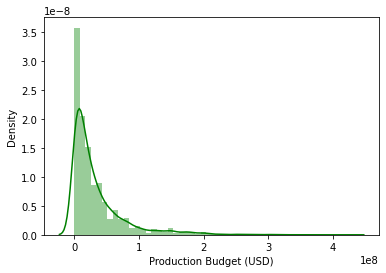

In [16]:
#plot distribution
x = pd.Series(movies_budget['production_budgetINT'], name = "Production Budget (USD)")
sns.distplot(x, color = "green")

<AxesSubplot:xlabel='Worldwide Gross (USD)', ylabel='Density'>

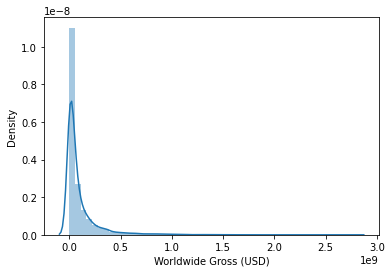

In [17]:
#plot distribution
x = pd.Series(movies_budget['worldwide_grossINT'], name = "Worldwide Gross (USD)")
sns.distplot(x)

In [18]:
#test for normality
st.normaltest(movies_budget['production_budgetINT'])

NormaltestResult(statistic=3117.059393788195, pvalue=0.0)

In [19]:
#test for normality
st.normaltest(movies_budget['worldwide_grossINT'])

NormaltestResult(statistic=4983.028689614257, pvalue=0.0)

We reject the null hypothesis that production budget and worldwide gross are normally distributed at all reasonable levels. However, the CLM assumptions say we can generally relax the assumption of normality with large n.

In [20]:
lm = sm.OLS.from_formula('worldwide_grossINT ~ production_budgetINT',data = movies_budget)
result = lm.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     worldwide_grossINT   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     6793.
Date:                Fri, 29 Jul 2022   Prob (F-statistic):               0.00
Time:                        16:13:04   Log-Likelihood:            -1.0838e+05
No. Observations:                5415   AIC:                         2.168e+05
Df Residuals:                    5413   BIC:                         2.168e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -6.915e+06 

## Conclusion

Our simple linear regression suggests that an increase in 1 dollar in production budget is associated with an increase in dollars in worldwide gross, statistically signficant at all reasonable levels. Our R-squared is .557, which means that production budget explains 55.7% of the sample variation of worldwide gross. 

Given our time constraints, we were unable to make a more accurate and complex model. Our simple linear regression has issues of omitted variable bias and heteroskedasticity, however it still gives us a good basic idea of the relationship between budget and revenue. 

## Top Studios Budgets

In [21]:
movie_studio_budget.head()

,release_date,movie,studio,production_budgetINT,worldwide_grossINT
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,BV,410600000,1045663875
1,2015-05-01,Avengers: Age of Ultron,BV,330600000,1403013963
2,2018-04-27,Avengers: Infinity War,BV,300000000,2048134200
3,2017-11-17,Justice League,WB,300000000,655945209
4,2015-11-06,Spectre,Sony,300000000,879620923


In [22]:
movie_studio_budget.sort_values(by = 'release_date')

,release_date,movie,studio,production_budgetINT,worldwide_grossINT
414,1984-06-22,The Karate Kid,Sony,8000000,90815558
652,1986-04-18,Legend,Uni.,25000000,23506237
523,1986-10-03,Playing for Keeps,FD,35000000,2000000
640,1999-08-04,The Gambler,Par.,3000000,101773
229,2001-06-08,Evolution,IFC,80000000,98341932
...,...,...,...,...,...
80,2018-12-21,Aquaman,WB,160000000,1146894640
173,2018-12-21,Bumblebee,Par.,102000000,465195589
722,2018-12-25,On the Basis of Sex,Focus,20000000,38073377
304,2018-12-25,Vice,Annapurna,60000000,70883171


In [23]:
top_studios = movie_studio_budget[['studio', 'production_budgetINT', 'worldwide_grossINT']].groupby(['studio']).mean()
top_studios = top_studios.sort_values(by = 'worldwide_grossINT', ascending = False).reset_index().head(10)
top_studios

,studio,production_budgetINT,worldwide_grossINT
0,P/DW,1.334000e+08,5.078028e+08
1,BV,1.312611e+08,4.623058e+08
2,GrtIndia,3.000000e+07,2.635029e+08
3,Fox,7.050455e+07,2.435983e+08
4,Sony,6.825000e+07,2.378623e+08
5,Uni.,5.639060e+07,2.335837e+08
6,WB,7.443381e+07,2.211128e+08
7,Par.,6.445946e+07,1.951109e+08
8,Strand,4.500000e+07,1.742782e+08
9,MGM,4.300000e+07,1.397796e+08


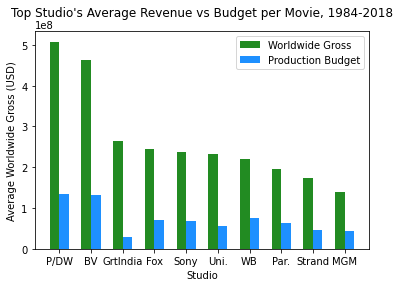

In [24]:
w=0.3
x = list(top_studios['studio'])
worldwide_gross = list(top_studios['worldwide_grossINT'])
production_budget = list(top_studios['production_budgetINT'])

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

plt.bar(bar1,worldwide_gross,w,label='Worldwide Gross', color = 'forestgreen')
plt.bar(bar2,production_budget,w,label='Production Budget', color = 'dodgerblue')
plt.title("Top Studio's Average Revenue vs Budget per Movie, 1984-2018", pad = 15)
plt.xticks(bar1+w/2,x)
plt.xlabel('Studio')
plt.ylabel('Average Worldwide Gross (USD)')
plt.legend()

In [25]:
top_studios_total = movie_studio_budget[['studio', 'production_budgetINT', 'worldwide_grossINT']].groupby(['studio']).sum()
top_studios_total = top_studios_total.sort_values(by = 'worldwide_grossINT', ascending = False).reset_index().head(10)
top_studios_total

,studio,production_budgetINT,worldwide_grossINT
0,BV,9450800000,33286017937
1,WB,10346300000,30734676216
2,Uni.,6597700000,27329288200
3,Fox,7755500000,26795813328
4,Sony,5050500000,17601810459
5,Par.,4770000000,14438207167
6,LGF,2069387650,6983389000
7,P/DW,1334000000,5078027601
8,LG/S,1657500000,3815924856
9,Wein.,838000000,2819991732


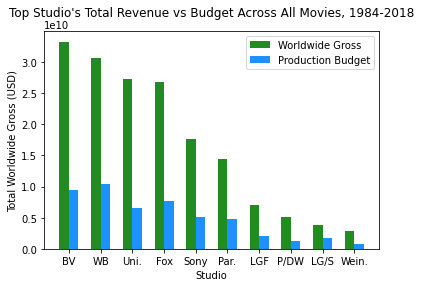

In [26]:
w=0.3
x = list(top_studios_total['studio'])
worldwide_gross = list(top_studios_total['worldwide_grossINT'])
production_budget = list(top_studios_total['production_budgetINT'])

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

plt.bar(bar1,(worldwide_gross),w,label='Worldwide Gross', color = 'forestgreen')
plt.bar(bar2,(production_budget),w,label='Production Budget', color = 'dodgerblue')
plt.title("Top Studio's Total Revenue vs Budget Across All Movies, 1984-2018", pad = 15)
plt.xticks(bar1+w/2,x)
plt.xlabel('Studio')
plt.ylabel('Total Worldwide Gross (USD)')
plt.legend()

## Recommendation

We found there is a significant correlation between budget and revenue, suggesting that an increase in production budget is associated with an increase in gross revenue. However, our linear model doesn't take into account what looks to be diminishing returns to increasing production budget. It looks like the diminishing returns begin between 200,000,000 USD and 250,000,000 USD. Looking at other studios, our top competitors specifically, we can see that they spend between 43,000,000 USD and 130,000,000 USD in their production budget per movie.